### Notes:
- train only on the elements in the material?

In [1]:
import numpy as np
from sklearn import linear_model, model_selection, metrics

import matplotlib.pyplot as plt

import sys
sys.path.insert(1, "../src/")
from material import Material
from bandgappredictions import BandGapPredictions

In [2]:
csv_path = "../data/training/materialsproject_output/"
json_path = "../data/training/materialsproject_json/"

In [3]:
Cd22S45 = Material(formula="Cd22S45",density=2.34)
Si3Ge4 = Material(formula="Si3Ge4",density=1.23,volume=57)
SiGe = Material(formula="SiGe",density=3.824,volume=43.741,formation_energy=0.024,
                crystal_system="cubic",spacegroup="F43m",E_above_hull=0.024,Nsites=2) #taken from mp-1219182

materials_list = [Cd22S45,Si3Ge4,SiGe]
band_gap_predictions = BandGapPredictions(csv_path,json_path,materials_list)
predictions = band_gap_predictions.predictions

In [4]:
for material in band_gap_predictions.materials_to_predict:
    material_model_score = predictions[material]["model_score"]
    material_predicted_band_gap = predictions[material]["band_gap__eV"]
    print(f""" 
    {material}
    -----------
    model score: {material_model_score}
    band gap: {material_predicted_band_gap} eV""")

 
    Cd22S45
    -----------
    model score: 0.3831657230882035
    band gap: 1.5391599131628855 eV
 
    Si3Ge4
    -----------
    model score: 0.4499450886822473
    band gap: 1.1430988171594993 eV
 
    SiGe
    -----------
    model score: 0.46051686622963456
    band gap: 0.8275264284370217 eV


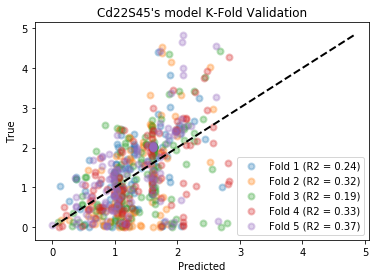

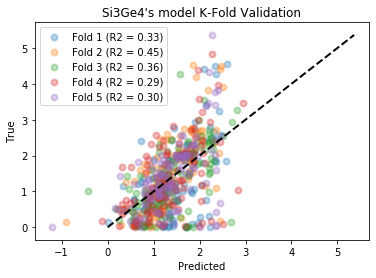

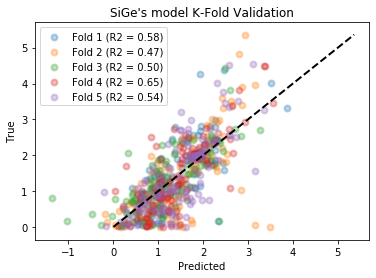

In [5]:
# K fold validation
# https://towardsdatascience.com/machine-learning-with-python-regression-complete-tutorial-47268e546cea
for material in band_gap_predictions.materials_to_predict:
    scores = []
    cv = model_selection.KFold(n_splits=5, shuffle=True)
    fig = plt.figure()
    i = 1

    X_train = predictions[material]["X_train"]
    y_train = predictions[material]["y_train"]
    model = predictions[material]["model"]
    
    for train, test in cv.split(X_train, y_train):
        prediction = model.fit(X_train[train],
                        y_train[train]).predict(X_train[test])
        true = y_train[test]
        score = metrics.r2_score(true, prediction)
        scores.append(score)
        plt.scatter(prediction, true, lw=2, alpha=0.3, 
                    label='Fold %d (R2 = %0.2f)' % (i,score))
        i = i+1
    plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
                linestyle='--', lw=2, color='black')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"{material}'s model K-Fold Validation")
    plt.legend()
plt.show()